# NBA Home Ground Advantage Analysis
### This notebook covers a study into whether certain teams perform better at home. 
### Points, assists and rebound differentials are calculated and compared to determine which NBA team was the most formidable at home, in the 2021-2022 NBA season.
### Data exported from nba.com and saved as a csv

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Reading in Home and Road Dataframes. 

In [3]:
home_df = pd.read_csv('home_2022.csv')

In [4]:
home_df.head()

,NUM,PLAYER,TEAM,AGE,GP,W,L,MIN,PTS,FGM,...,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-
0,1,LeBron James,LAL,37,31,16,15,37.3,31.2,11.8,...,8.0,6.2,3.6,1.5,0.9,2.2,53.4,11,2,0.5
1,2,Giannis Antetokounmpo,MIL,27,32,22,10,33.5,31.1,10.8,...,12.5,5.8,3.6,1.2,1.4,3.3,58.9,25,3,7.0
2,3,Trae Young,ATL,23,38,26,12,34.8,30.2,9.7,...,3.8,9.5,4.3,1.0,0.1,1.8,47.9,21,0,5.1
3,4,Luka Doncic,DAL,23,34,25,9,35.4,29.9,10.4,...,9.0,8.7,4.1,1.2,0.6,2.5,54.9,23,6,6.8
4,5,Kevin Durant,BKN,33,31,18,13,37.6,29.2,10.4,...,7.3,6.2,3.5,0.8,1.0,2.0,49.0,10,2,0.8


In [5]:
home_df.columns

Index(['NUM', 'PLAYER', 'TEAM', 'AGE', 'GP', 'W', 'L', 'MIN', 'PTS', 'FGM',
       'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB',
       'REB', 'AST', 'TOV', 'STL', 'BLK', 'PF', 'FP', 'DD2', 'TD3', '+/-'],
      dtype='object')

In [6]:
home_df.shape

(499, 30)

In [7]:
road_df = pd.read_csv('road_2022.csv')

In [8]:
road_df.head()

,NUM,PLAYER,TEAM,AGE,GP,W,L,MIN,PTS,FGM,...,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-
0,1,Joel Embiid,PHI,28,34,25,9,34.0,32.0,10.4,...,11.4,3.7,2.9,1.1,1.5,2.6,56.2,23,0,4.9
1,2,Kevin Durant,BKN,33,24,18,6,36.7,30.8,10.7,...,7.6,6.6,3.4,1.0,0.9,2.1,51.9,8,2,10.1
2,3,Victor Oladipo,MIA,30,2,1,1,31.5,30.5,10.0,...,6.5,5.5,4.5,2.0,0.0,2.0,48.1,1,0,0.5
3,4,LeBron James,LAL,37,25,9,16,37.2,29.1,11.0,...,8.5,6.3,3.3,1.1,1.3,2.1,52.6,10,4,-5.4
4,5,Devin Booker,PHX,25,34,30,4,34.5,29.0,10.4,...,5.1,5.0,2.2,1.1,0.2,2.8,44.2,3,0,9.6


### Assess DataFrames for their statistics, reviewing shape, column names, null and duplicate rows

In [9]:
road_df.shape

(499, 30)

In [10]:
road_df.columns

Index(['NUM', 'PLAYER', 'TEAM', 'AGE', 'GP', 'W', 'L', 'MIN', 'PTS', 'FGM',
       'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB',
       'REB', 'AST', 'TOV', 'STL', 'BLK', 'PF', 'FP', 'DD2', 'TD3', '+/-'],
      dtype='object')

In [11]:
home_df.isnull().any()

NUM       False
PLAYER    False
TEAM      False
AGE       False
GP        False
W         False
L         False
MIN       False
PTS       False
FGM       False
FGA       False
FG%       False
3PM       False
3PA       False
3P%       False
FTM       False
FTA       False
FT%       False
OREB      False
DREB      False
REB       False
AST       False
TOV       False
STL       False
BLK       False
PF        False
FP        False
DD2       False
TD3       False
+/-       False
dtype: bool

In [12]:
home_df.dtypes

NUM         int64
PLAYER     object
TEAM       object
AGE         int64
GP          int64
W           int64
L           int64
MIN       float64
PTS       float64
FGM       float64
FGA       float64
FG%       float64
3PM       float64
3PA       float64
3P%       float64
FTM       float64
FTA       float64
FT%       float64
OREB      float64
DREB      float64
REB       float64
AST       float64
TOV       float64
STL       float64
BLK       float64
PF        float64
FP        float64
DD2         int64
TD3         int64
+/-       float64
dtype: object

In [13]:
road_df.isnull().any()

NUM       False
PLAYER    False
TEAM      False
AGE       False
GP        False
W         False
L         False
MIN       False
PTS       False
FGM       False
FGA       False
FG%       False
3PM       False
3PA       False
3P%       False
FTM       False
FTA       False
FT%       False
OREB      False
DREB      False
REB       False
AST       False
TOV       False
STL       False
BLK       False
PF        False
FP        False
DD2       False
TD3       False
+/-       False
dtype: bool

In [14]:
road_df.dtypes

NUM         int64
PLAYER     object
TEAM       object
AGE         int64
GP          int64
W           int64
L           int64
MIN       float64
PTS       float64
FGM       float64
FGA       float64
FG%       float64
3PM       float64
3PA       float64
3P%       float64
FTM       float64
FTA       float64
FT%       float64
OREB      float64
DREB      float64
REB       float64
AST       float64
TOV       float64
STL       float64
BLK       float64
PF        float64
FP        float64
DD2         int64
TD3         int64
+/-       float64
dtype: object

In [15]:
home_df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
494    False
495    False
496    False
497    False
498    False
Length: 499, dtype: bool

In [16]:
home_df.duplicated().value_counts()

False    499
dtype: int64

In [17]:
road_df.duplicated().value_counts()

False    499
dtype: int64

### To allow for one to one comparisons, players not common to both tables are removed from each DataFrame

In [18]:
home_df['PLAYER'].isin(road_df['PLAYER']).value_counts()

True     465
False     34
Name: PLAYER, dtype: int64

In [19]:
road_df['PLAYER'].isin(home_df['PLAYER']).value_counts()

True     465
False     34
Name: PLAYER, dtype: int64

In [20]:
H_in_R = home_df[home_df['PLAYER'].isin(road_df['PLAYER'])]

In [21]:
H_in_R.shape

(465, 30)

In [22]:
H_in_R

,NUM,PLAYER,TEAM,AGE,GP,W,L,MIN,PTS,FGM,...,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-
0,1,LeBron James,LAL,37,31,16,15,37.3,31.2,11.8,...,8.0,6.2,3.6,1.5,0.9,2.2,53.4,11,2,0.5
1,2,Giannis Antetokounmpo,MIL,27,32,22,10,33.5,31.1,10.8,...,12.5,5.8,3.6,1.2,1.4,3.3,58.9,25,3,7.0
2,3,Trae Young,ATL,23,38,26,12,34.8,30.2,9.7,...,3.8,9.5,4.3,1.0,0.1,1.8,47.9,21,0,5.1
3,4,Luka Doncic,DAL,23,34,25,9,35.4,29.9,10.4,...,9.0,8.7,4.1,1.2,0.6,2.5,54.9,23,6,6.8
4,5,Kevin Durant,BKN,33,31,18,13,37.6,29.2,10.4,...,7.3,6.2,3.5,0.8,1.0,2.0,49.0,10,2,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,491,Juancho Hernangomez,UTA,26,19,13,6,8.6,2.4,0.7,...,2.0,0.4,0.5,0.3,0.3,0.4,6.7,0,0,0.5
492,493,Charles Bassey,PHI,21,10,5,5,5.0,2.3,1.0,...,1.8,0.2,0.2,0.3,0.7,0.9,7.6,0,0,-0.8
493,493,Javonte Smart,MIA,23,10,8,2,11.7,2.3,0.9,...,1.1,1.3,0.5,0.3,0.2,0.9,6.6,0,0,-2.7
495,496,Devon Dotson,CHI,22,7,4,3,6.1,2.1,0.9,...,0.7,1.6,0.4,0.1,0.0,0.9,5.4,0,0,3.0


In [23]:
road_final = road_df[road_df['PLAYER'].isin(H_in_R['PLAYER'])]

In [24]:
home_final = home_df[home_df['PLAYER'].isin(road_final['PLAYER'])]

In [25]:
home_final.shape

(465, 30)

In [26]:
road_final.shape

(465, 30)

In [27]:
home_final['PLAYER'].isin(road_final['PLAYER']).value_counts()

True    465
Name: PLAYER, dtype: int64

In [28]:
road_final['PLAYER'].isin(home_final['PLAYER']).value_counts()

True    465
Name: PLAYER, dtype: int64

In [29]:
# points

# Points analysis
### The DataFrames are merged to form a point summary DataFrame, where a point differential is calcluated and compared for teams and players 

In [30]:
points_sumry = pd.merge(home_final[['PLAYER', 'TEAM','GP','PTS', 'FG%', '3P%', 'FT%', 'FTA','FGA']], road_final[['PLAYER','GP','PTS', 'FG%', '3P%', 'FT%','FTA','FGA']],
                    on = 'PLAYER', how = 'inner')

In [31]:
points_sumry

,PLAYER,TEAM,GP_x,PTS_x,FG%_x,3P%_x,FT%_x,FTA_x,FGA_x,GP_y,PTS_y,FG%_y,3P%_y,FT%_y,FTA_y,FGA_y
0,LeBron James,LAL,31,31.2,54.2,37.6,77.4,6.1,21.7,25,29.1,50.3,34.0,73.3,5.8,21.9
1,Giannis Antetokounmpo,MIL,32,31.1,56.1,26.8,74.6,11.3,19.3,35,28.7,54.6,32.2,70.0,11.5,17.9
2,Trae Young,ATL,38,30.2,48.0,41.4,91.6,8.1,20.2,38,26.5,44.1,35.0,88.9,6.4,20.4
3,Luka Doncic,DAL,34,29.9,46.6,35.6,73.5,8.2,22.3,31,26.8,44.7,35.0,75.7,6.8,20.8
4,Kevin Durant,BKN,31,29.2,50.2,37.3,91.4,7.1,20.6,24,30.8,54.0,39.6,90.5,7.9,19.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460,Juancho Hernangomez,UTA,19,2.4,36.8,29.2,62.5,0.8,2.0,21,4.1,44.1,37.8,50.0,0.9,3.2
461,Charles Bassey,PHI,10,2.3,55.6,0.0,100.0,0.3,1.8,13,3.5,69.0,0.0,66.7,0.7,2.2
462,Javonte Smart,MIA,10,2.3,27.3,16.7,75.0,0.4,3.3,7,4.0,37.0,40.0,100.0,0.3,3.9
463,Devon Dotson,CHI,7,2.1,46.2,16.7,66.7,0.4,1.9,4,3.5,50.0,33.3,50.0,1.5,2.5


In [32]:
print(f"points summary shape is {points_sumry.shape}\n")


print(f"points summary columns null report is: \n{points_sumry.isnull().any()}")

points summary shape is (465, 16)

points summary columns null report is: 
PLAYER    False
TEAM      False
GP_x      False
PTS_x     False
FG%_x     False
3P%_x     False
FT%_x     False
FTA_x     False
FGA_x     False
GP_y      False
PTS_y     False
FG%_y     False
3P%_y     False
FT%_y     False
FTA_y     False
FGA_y     False
dtype: bool


In [33]:
col_rename = {col: col.replace('_x', '_H') for col in points_sumry.columns if col.endswith('_x')}

In [34]:
col_rename.update({col: col.replace('_y', '_R') for col in points_sumry.columns if col.endswith('_y')})

In [35]:
col_rename

{'GP_x': 'GP_H',
 'PTS_x': 'PTS_H',
 'FG%_x': 'FG%_H',
 '3P%_x': '3P%_H',
 'FT%_x': 'FT%_H',
 'FTA_x': 'FTA_H',
 'FGA_x': 'FGA_H',
 'GP_y': 'GP_R',
 'PTS_y': 'PTS_R',
 'FG%_y': 'FG%_R',
 '3P%_y': '3P%_R',
 'FT%_y': 'FT%_R',
 'FTA_y': 'FTA_R',
 'FGA_y': 'FGA_R'}

In [36]:
points_sumry = points_sumry.rename(columns = col_rename)

In [37]:
points_sumry.head()

,PLAYER,TEAM,GP_H,PTS_H,FG%_H,3P%_H,FT%_H,FTA_H,FGA_H,GP_R,PTS_R,FG%_R,3P%_R,FT%_R,FTA_R,FGA_R
0,LeBron James,LAL,31,31.2,54.2,37.6,77.4,6.1,21.7,25,29.1,50.3,34.0,73.3,5.8,21.9
1,Giannis Antetokounmpo,MIL,32,31.1,56.1,26.8,74.6,11.3,19.3,35,28.7,54.6,32.2,70.0,11.5,17.9
2,Trae Young,ATL,38,30.2,48.0,41.4,91.6,8.1,20.2,38,26.5,44.1,35.0,88.9,6.4,20.4
3,Luka Doncic,DAL,34,29.9,46.6,35.6,73.5,8.2,22.3,31,26.8,44.7,35.0,75.7,6.8,20.8
4,Kevin Durant,BKN,31,29.2,50.2,37.3,91.4,7.1,20.6,24,30.8,54.0,39.6,90.5,7.9,19.8


### Calculating the home vs away point differential
### Group by teams and calculate the sum of the point differential

In [38]:
points_sumry['PTS_DIFF'] = points_sumry['PTS_H'] - points_sumry['PTS_R']

In [39]:
team_point_diff = points_sumry.groupby('TEAM')['PTS_DIFF'].sum()

In [40]:
team_point_diff = team_point_diff.sort_values(ascending = False)

In [41]:
team_point_diff

TEAM
PHX    11.9
CLE     9.1
NOP     8.0
DEN     6.6
HOU     5.7
MIL     5.4
MEM     5.3
WAS     3.5
DAL     3.2
NYK     3.1
ATL     0.8
UTA     0.7
PHI    -0.5
BOS    -0.5
CHI    -1.0
IND    -2.3
TOR    -2.4
SAS    -2.7
DET    -2.8
MIN    -3.1
BKN    -3.6
GSW    -4.2
CHA    -4.5
LAC    -4.9
SAC    -5.9
POR    -6.9
OKC    -8.3
LAL   -13.7
ORL   -14.9
MIA   -34.1
Name: PTS_DIFF, dtype: float64

Text(0, 0.5, 'Point Difference')

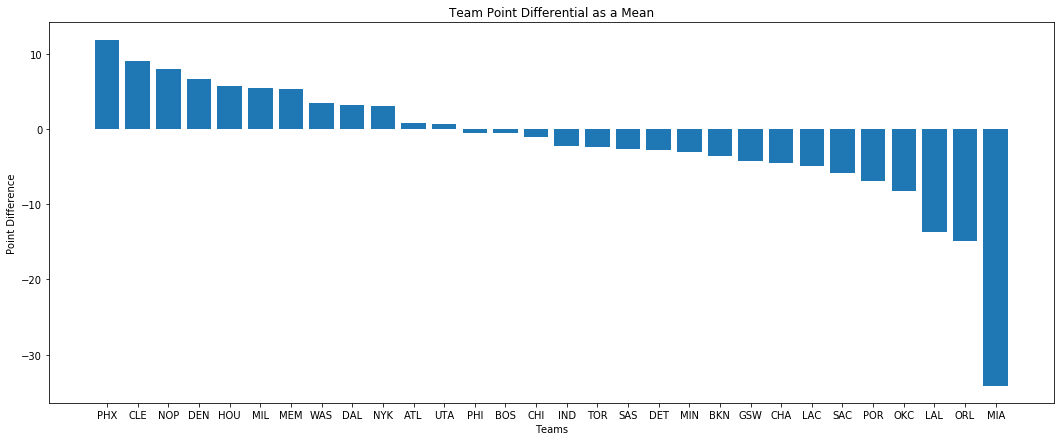

In [42]:
fig, ax = plt.subplots(figsize=(18,7))
ax.bar(team_point_diff.index, team_point_diff.values)
ax.set_title('Team Point Differential as a Mean')
ax.set_xlabel('Teams')
ax.set_ylabel('Point Difference')

### Miami are a massive outlier ! For a good team in 2022 this is suprising, pulling up Miami below

In [43]:
points_sumry[points_sumry['TEAM'] == 'MIA']

,PLAYER,TEAM,GP_H,PTS_H,FG%_H,3P%_H,FT%_H,FTA_H,FGA_H,GP_R,PTS_R,FG%_R,3P%_R,FT%_R,FTA_R,FGA_R,PTS_DIFF
28,Jimmy Butler,MIA,32,21.8,50.4,25.5,85.9,8.4,14.1,25,20.8,45.1,21.3,88.7,7.4,15.2,1.0
34,Tyler Herro,MIA,34,20.9,47.5,44.2,89.0,3.7,15.6,32,20.6,42.1,35.9,83.7,2.9,18.5,0.3
44,Bam Adebayo,MIA,30,18.8,58.4,0.0,76.6,5.6,12.4,26,19.4,52.8,0.0,74.0,6.7,13.7,-0.6
136,Kyle Lowry,MIA,29,11.9,43.8,36.6,83.1,2.2,9.2,34,14.7,44.2,38.4,86.2,3.2,10.6,-2.8
170,Duncan Robinson,MIA,41,10.6,40.5,37.3,87.5,0.6,8.9,38,11.3,39.3,37.1,81.1,1.0,9.5,-0.7
187,Max Strus,MIA,37,9.9,43.5,39.5,80.0,0.5,8.1,31,11.4,44.9,42.6,78.8,1.1,8.5,-1.5
203,Caleb Martin,MIA,30,9.3,52.3,48.6,73.6,1.8,6.5,30,9.1,49.3,34.6,80.0,1.3,7.2,0.2
221,Gabe Vincent,MIA,35,8.9,40.3,35.3,87.5,0.7,8.1,33,8.5,43.5,38.7,76.7,0.9,7.0,0.4
246,Markieff Morris,MIA,10,8.2,47.9,27.3,88.9,0.9,7.1,7,6.7,46.5,41.2,0.0,0.0,6.1,1.5
270,P.J. Tucker,MIA,36,7.5,46.3,35.0,80.0,0.8,6.3,35,7.7,50.7,48.9,67.7,0.9,5.7,-0.2


### Victor Oladipo is the outlier, came off a long term injury and only played 8 games (of which poorly at home)
### Realising now more conditions need to be inplace, the same amount of players considered in each teams needs to be the same, and how many games set as a minimum to remove outliers like this

In [44]:
points_sumry.groupby('TEAM')['PTS_DIFF'].count().sort_values(ascending = False)

TEAM
POR    23
OKC    22
DET    20
DEN    18
SAC    18
LAL    17
CHI    17
ORL    17
MIL    16
MEM    16
IND    16
DAL    15
NOP    15
CLE    15
MIA    15
BKN    15
TOR    15
LAC    15
GSW    14
WAS    14
UTA    14
PHX    14
SAS    14
ATL    14
HOU    13
MIN    13
NYK    13
BOS    13
PHI    12
CHA    12
Name: PTS_DIFF, dtype: int64

### Big differences here
### Taking the top 10 scorers, game minimum 40 games played
### To determine which players to take, a new column Average Points is calculated. This averages out the home vs road scoring columns. Then a rank is done per team by the average points. 8 players per team are kepy for the analysis as this represents the main rotation players performing every night.

In [47]:
points_sumry['GP_TTL'] = points_sumry['GP_H'] + points_sumry['GP_R']

In [48]:
points_sumry[points_sumry['GP_TTL'] > 40].count()

PLAYER      346
TEAM        346
GP_H        346
PTS_H       346
FG%_H       346
3P%_H       346
FT%_H       346
FTA_H       346
FGA_H       346
GP_R        346
PTS_R       346
FG%_R       346
3P%_R       346
FT%_R       346
FTA_R       346
FGA_R       346
PTS_DIFF    346
GP_TTL      346
dtype: int64

In [53]:
points_sumry = points_sumry[points_sumry['GP_TTL'] > 40]

In [54]:
points_sumry['AVG_PTS'] = (points_sumry['PTS_H']+points_sumry['PTS_R'])/2

In [55]:
points_sumry.head()

,PLAYER,TEAM,GP_H,PTS_H,FG%_H,3P%_H,FT%_H,FTA_H,FGA_H,GP_R,PTS_R,FG%_R,3P%_R,FT%_R,FTA_R,FGA_R,PTS_DIFF,GP_TTL,AVG_PTS
0,LeBron James,LAL,31,31.2,54.2,37.6,77.4,6.1,21.7,25,29.1,50.3,34.0,73.3,5.8,21.9,2.1,56,30.15
1,Giannis Antetokounmpo,MIL,32,31.1,56.1,26.8,74.6,11.3,19.3,35,28.7,54.6,32.2,70.0,11.5,17.9,2.4,67,29.90
2,Trae Young,ATL,38,30.2,48.0,41.4,91.6,8.1,20.2,38,26.5,44.1,35.0,88.9,6.4,20.4,3.7,76,28.35
3,Luka Doncic,DAL,34,29.9,46.6,35.6,73.5,8.2,22.3,31,26.8,44.7,35.0,75.7,6.8,20.8,3.1,65,28.35
4,Kevin Durant,BKN,31,29.2,50.2,37.3,91.4,7.1,20.6,24,30.8,54.0,39.6,90.5,7.9,19.8,-1.6,55,30.00


In [59]:
points_sumry['Points_rankings']  = points_sumry.groupby('TEAM')['AVG_PTS'].rank(method = 'first', ascending = False)

In [60]:
points_sumry.head()

,PLAYER,TEAM,GP_H,PTS_H,FG%_H,3P%_H,FT%_H,FTA_H,FGA_H,GP_R,PTS_R,FG%_R,3P%_R,FT%_R,FTA_R,FGA_R,PTS_DIFF,GP_TTL,AVG_PTS,Points_rankings
0,LeBron James,LAL,31,31.2,54.2,37.6,77.4,6.1,21.7,25,29.1,50.3,34.0,73.3,5.8,21.9,2.1,56,30.15,1.0
1,Giannis Antetokounmpo,MIL,32,31.1,56.1,26.8,74.6,11.3,19.3,35,28.7,54.6,32.2,70.0,11.5,17.9,2.4,67,29.90,1.0
2,Trae Young,ATL,38,30.2,48.0,41.4,91.6,8.1,20.2,38,26.5,44.1,35.0,88.9,6.4,20.4,3.7,76,28.35,1.0
3,Luka Doncic,DAL,34,29.9,46.6,35.6,73.5,8.2,22.3,31,26.8,44.7,35.0,75.7,6.8,20.8,3.1,65,28.35,1.0
4,Kevin Durant,BKN,31,29.2,50.2,37.3,91.4,7.1,20.6,24,30.8,54.0,39.6,90.5,7.9,19.8,-1.6,55,30.00,1.0


In [61]:
points_sumry[points_sumry['TEAM'] == 'PHI']

,PLAYER,TEAM,GP_H,PTS_H,FG%_H,3P%_H,FT%_H,FTA_H,FGA_H,GP_R,PTS_R,FG%_R,3P%_R,FT%_R,FTA_R,FGA_R,PTS_DIFF,GP_TTL,AVG_PTS,Points_rankings
5,Joel Embiid,PHI,34,29.1,48.5,34.8,80.9,11.5,19.1,34,32.0,51.3,39.5,82.0,12.1,20.2,-2.9,68,30.55,1.0
24,James Harden,PHI,31,22.5,41.2,30.8,88.3,8.5,15.5,34,21.6,40.9,35.0,87.1,8.0,15.0,0.9,65,22.05,2.0
56,Tyrese Maxey,PHI,39,17.7,48.6,42.1,85.0,3.3,13.5,36,17.3,48.5,43.4,88.2,3.3,13.0,0.4,75,17.50,3.0
58,Tobias Harris,PHI,37,17.6,50.1,36.9,85.1,2.5,14.0,36,16.9,46.3,36.6,83.3,3.0,14.0,0.7,73,17.25,4.0
200,Georges Niang,PHI,37,9.4,41.8,38.0,96.3,0.7,7.9,39,9.1,45.8,42.8,81.3,0.8,6.9,0.3,76,9.25,5.0
237,Shake Milton,PHI,27,8.4,42.6,25.4,87.5,1.5,7.7,28,7.9,43.3,37.8,78.8,1.2,6.9,0.5,55,8.15,6.0
269,Furkan Korkmaz,PHI,34,7.5,36.4,25.3,88.0,1.5,7.0,33,7.7,41.1,33.3,70.6,1.0,7.0,-0.2,67,7.60,7.0
315,Matisse Thybulle,PHI,35,6.3,54.1,35.0,80.8,0.7,4.5,31,5.1,45.4,26.6,76.5,0.5,4.5,1.2,66,5.70,9.0
338,Danny Green,PHI,34,5.7,38.5,38.7,60.0,0.1,5.1,28,6.1,40.4,37.2,88.9,0.3,5.2,-0.4,62,5.90,8.0
393,DeAndre Jordan,PHI,26,4.4,67.6,0.0,60.9,0.9,2.8,22,4.2,60.9,0.0,47.1,0.8,3.1,0.2,48,4.30,10.0


In [62]:
points_sumry = points_sumry[points_sumry['Points_rankings'] <=8]

In [73]:
points_sumry[points_sumry['TEAM'] == 'PHI']

,PLAYER,TEAM,GP_H,PTS_H,FG%_H,3P%_H,FT%_H,FTA_H,FGA_H,GP_R,PTS_R,FG%_R,3P%_R,FT%_R,FTA_R,FGA_R,PTS_DIFF,GP_TTL,AVG_PTS,Points_rankings
5,Joel Embiid,PHI,34,29.1,48.5,34.8,80.9,11.5,19.1,34,32.0,51.3,39.5,82.0,12.1,20.2,-2.9,68,30.55,1.0
24,James Harden,PHI,31,22.5,41.2,30.8,88.3,8.5,15.5,34,21.6,40.9,35.0,87.1,8.0,15.0,0.9,65,22.05,2.0
56,Tyrese Maxey,PHI,39,17.7,48.6,42.1,85.0,3.3,13.5,36,17.3,48.5,43.4,88.2,3.3,13.0,0.4,75,17.50,3.0
58,Tobias Harris,PHI,37,17.6,50.1,36.9,85.1,2.5,14.0,36,16.9,46.3,36.6,83.3,3.0,14.0,0.7,73,17.25,4.0
200,Georges Niang,PHI,37,9.4,41.8,38.0,96.3,0.7,7.9,39,9.1,45.8,42.8,81.3,0.8,6.9,0.3,76,9.25,5.0
237,Shake Milton,PHI,27,8.4,42.6,25.4,87.5,1.5,7.7,28,7.9,43.3,37.8,78.8,1.2,6.9,0.5,55,8.15,6.0
269,Furkan Korkmaz,PHI,34,7.5,36.4,25.3,88.0,1.5,7.0,33,7.7,41.1,33.3,70.6,1.0,7.0,-0.2,67,7.60,7.0
338,Danny Green,PHI,34,5.7,38.5,38.7,60.0,0.1,5.1,28,6.1,40.4,37.2,88.9,0.3,5.2,-0.4,62,5.90,8.0


In [74]:
points_sumry[points_sumry['TEAM'] == 'MIA']

,PLAYER,TEAM,GP_H,PTS_H,FG%_H,3P%_H,FT%_H,FTA_H,FGA_H,GP_R,PTS_R,FG%_R,3P%_R,FT%_R,FTA_R,FGA_R,PTS_DIFF,GP_TTL,AVG_PTS,Points_rankings
28,Jimmy Butler,MIA,32,21.8,50.4,25.5,85.9,8.4,14.1,25,20.8,45.1,21.3,88.7,7.4,15.2,1.0,57,21.30,1.0
34,Tyler Herro,MIA,34,20.9,47.5,44.2,89.0,3.7,15.6,32,20.6,42.1,35.9,83.7,2.9,18.5,0.3,66,20.75,2.0
44,Bam Adebayo,MIA,30,18.8,58.4,0.0,76.6,5.6,12.4,26,19.4,52.8,0.0,74.0,6.7,13.7,-0.6,56,19.10,3.0
136,Kyle Lowry,MIA,29,11.9,43.8,36.6,83.1,2.2,9.2,34,14.7,44.2,38.4,86.2,3.2,10.6,-2.8,63,13.30,4.0
170,Duncan Robinson,MIA,41,10.6,40.5,37.3,87.5,0.6,8.9,38,11.3,39.3,37.1,81.1,1.0,9.5,-0.7,79,10.95,5.0
187,Max Strus,MIA,37,9.9,43.5,39.5,80.0,0.5,8.1,31,11.4,44.9,42.6,78.8,1.1,8.5,-1.5,68,10.65,6.0
203,Caleb Martin,MIA,30,9.3,52.3,48.6,73.6,1.8,6.5,30,9.1,49.3,34.6,80.0,1.3,7.2,0.2,60,9.20,7.0
221,Gabe Vincent,MIA,35,8.9,40.3,35.3,87.5,0.7,8.1,33,8.5,43.5,38.7,76.7,0.9,7.0,0.4,68,8.70,8.0


### Miami now not showing Victor Oladipo as he has been removed for not having played enough games

In [75]:
points_sumry.count()

PLAYER             240
TEAM               240
GP_H               240
PTS_H              240
FG%_H              240
3P%_H              240
FT%_H              240
FTA_H              240
FGA_H              240
GP_R               240
PTS_R              240
FG%_R              240
3P%_R              240
FT%_R              240
FTA_R              240
FGA_R              240
PTS_DIFF           240
GP_TTL             240
AVG_PTS            240
Points_rankings    240
dtype: int64

In [76]:
team_point_diff = points_sumry.groupby('TEAM')['PTS_DIFF'].sum()

In [77]:
team_point_diff = team_point_diff.sort_values(ascending = False)

In [78]:
team_point_diff

TEAM
HOU    8.600000e+00
DAL    6.900000e+00
ATL    6.600000e+00
DET    5.800000e+00
MIL    5.600000e+00
DEN    4.400000e+00
CLE    4.400000e+00
UTA    4.000000e+00
IND    2.800000e+00
CHI    1.800000e+00
BOS    1.200000e+00
NYK    9.000000e-01
SAS    8.000000e-01
TOR    6.000000e-01
WAS    1.000000e-01
MEM    1.000000e-01
NOP    1.776357e-15
PHI   -7.000000e-01
PHX   -1.100000e+00
LAL   -1.500000e+00
BKN   -1.700000e+00
ORL   -1.900000e+00
GSW   -3.200000e+00
SAC   -3.400000e+00
LAC   -3.500000e+00
CHA   -3.500000e+00
MIA   -3.700000e+00
POR   -4.400000e+00
OKC   -5.900000e+00
MIN   -6.400000e+00
Name: PTS_DIFF, dtype: float64

Text(0, 0.5, 'Point Difference')

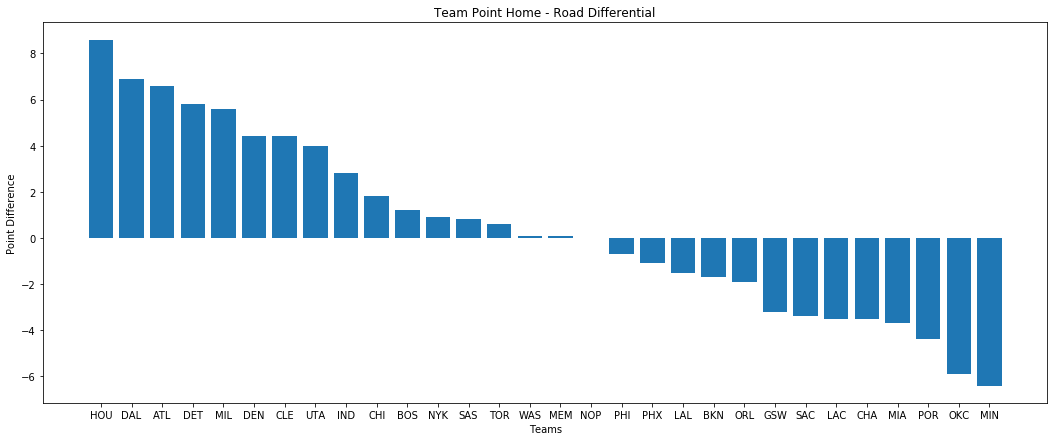

In [79]:
fig, ax = plt.subplots(figsize=(18,7))
ax.bar(team_point_diff.index, team_point_diff.values)
ax.set_title('Team Point Home - Road Differential')
ax.set_xlabel('Teams')
ax.set_ylabel('Point Difference')

### This graph is greatly different from above !
### Phoenix have dropped to negative, Houston elevated to No.1 
### The notoriously difficult arena to play in Denver sitting in 6th

In [101]:
points_sumry[points_sumry['TEAM'] == 'HOU']

,PLAYER,TEAM,GP_H,PTS_H,FG%_H,3P%_H,FT%_H,FTA_H,FGA_H,GP_R,...,FT%_R,FTA_R,FGA_R,PTS_DIFF,GP_TTL,AVG_PTS,Points_rankings,TS%_H,TS%_R,TS_DIFF
37,Christian Wood,HOU,33,20.1,52.9,45.1,63.9,4.5,13.9,35,...,61.1,5.3,12.0,4.2,68,18.00,1.0,0.626656,0.547615,0.079041
41,Jalen Green,HOU,34,19.4,44.3,35.4,82.5,4.2,15.2,33,...,75.3,2.8,13.2,4.4,67,17.20,2.0,0.564117,0.516173,0.047944
74,Kevin Porter Jr.,HOU,34,16.5,42.8,37.6,61.5,3.4,13.7,27,...,68.4,2.8,12.6,2.1,61,15.45,3.0,0.538688,0.516870,0.021817
116,Dennis Schroder,HOU,32,13.1,42.6,37.2,82.4,2.7,11.2,32,...,87.9,3.1,11.5,-0.9,64,13.55,4.0,0.524735,0.539603,-0.014868
127,Garrison Mathews,HOU,32,12.3,44.4,41.4,76.8,3.1,8.1,33,...,82.7,2.5,6.1,4.6,65,10.00,7.0,0.642465,0.528302,0.114164
130,Eric Gordon,HOU,28,12.1,43.9,34.3,85.9,2.3,9.6,29,...,70.4,2.4,10.2,-2.6,57,13.40,5.0,0.565817,0.648148,-0.082331
165,Jae'Sean Tate,HOU,38,10.8,47.9,34.0,69.1,2.1,8.7,40,...,71.8,2.6,9.9,-2.0,78,11.80,6.0,0.556845,0.574764,-0.017920
214,Alperen Sengun,HOU,34,9.0,44.9,23.0,73.2,3.3,6.9,38,...,69.2,3.2,7.7,-1.2,72,9.60,8.0,0.531444,0.553145,-0.021702


In [103]:
points_sumry[points_sumry['TEAM'] == 'MIN']

,PLAYER,TEAM,GP_H,PTS_H,FG%_H,3P%_H,FT%_H,FTA_H,FGA_H,GP_R,...,FT%_R,FTA_R,FGA_R,PTS_DIFF,GP_TTL,AVG_PTS,Points_rankings,TS%_H,TS%_R,TS_DIFF
14,Karl-Anthony Towns,MIN,38,24.8,52.1,41.5,82.0,6.7,16.5,36,...,82.5,5.9,16.3,0.4,74,24.60,1.0,0.630001,0.638660,-0.008659
48,Anthony Edwards,MIN,34,18.7,41.3,32.7,74.1,3.4,16.5,38,...,81.7,4.3,18.0,-4.9,72,21.15,2.0,0.516147,0.588749,-0.072602
76,D'Angelo Russell,MIN,29,16.3,39.0,29.5,82.1,3.7,14.2,36,...,82.8,3.7,15.6,-3.2,65,17.90,3.0,0.510732,0.561717,-0.050985
121,Malik Beasley,MIN,40,12.9,38.3,38.5,76.3,1.0,11.5,39,...,90.9,0.6,10.0,1.7,79,12.05,4.0,0.538622,0.544482,-0.005860
204,Patrick Beverley,MIN,31,9.3,42.7,33.1,74.6,2.3,7.3,27,...,69.4,2.3,7.8,0.2,58,9.20,6.0,0.554066,0.511667,0.042399
209,Jaylen Nowell,MIN,31,9.2,49.5,45.8,82.4,1.6,6.6,31,...,73.2,1.3,6.7,1.4,62,8.50,7.0,0.625000,0.532969,0.092031
220,Jaden McDaniels,MIN,36,8.9,46.2,30.9,80.6,1.0,7.6,34,...,80.0,1.0,8.3,-0.7,70,9.25,5.0,0.551084,0.547009,0.004075
267,Naz Reid,MIN,37,7.6,48.6,32.1,68.1,1.9,5.7,40,...,84.4,1.9,6.6,-1.3,77,8.25,8.0,0.575540,0.593136,-0.017596


###  Taking a closer look into the 1st & last ranked teams here
### Houstons 2 biggest scorers were strong at home, while the Timberwolves young guns suffered from an inconsistent year, and struggled at home

# True Shooting
### Adding in True Shooting Percent True Shooting Percentage
### Adjusted for three-pointers and free throws, and measures a player's efficiency at shooting the ball.

### TS% = 0.5PTS/(FGA + 0.475FTA)

In [80]:
points_sumry['TS%_H'] = 0.5*points_sumry['PTS_H']/(points_sumry['FGA_H']+ 0.475*points_sumry['FTA_H'])

In [81]:
points_sumry['TS%_R'] = 0.5*points_sumry['PTS_R']/(points_sumry['FGA_R']+ 0.475*points_sumry['FTA_R'])

In [82]:
points_sumry.head()

,PLAYER,TEAM,GP_H,PTS_H,FG%_H,3P%_H,FT%_H,FTA_H,FGA_H,GP_R,...,3P%_R,FT%_R,FTA_R,FGA_R,PTS_DIFF,GP_TTL,AVG_PTS,Points_rankings,TS%_H,TS%_R
0,LeBron James,LAL,31,31.2,54.2,37.6,77.4,6.1,21.7,25,...,34.0,73.3,5.8,21.9,2.1,56,30.15,1.0,0.634211,0.590144
1,Giannis Antetokounmpo,MIL,32,31.1,56.1,26.8,74.6,11.3,19.3,35,...,32.2,70.0,11.5,17.9,2.4,67,29.90,1.0,0.630384,0.614232
2,Trae Young,ATL,38,30.2,48.0,41.4,91.6,8.1,20.2,38,...,35.0,88.9,6.4,20.4,3.7,76,28.35,1.0,0.627924,0.565273
3,Luka Doncic,DAL,34,29.9,46.6,35.6,73.5,8.2,22.3,31,...,35.0,75.7,6.8,20.8,3.1,65,28.35,1.0,0.570720,0.557636
4,Kevin Durant,BKN,31,29.2,50.2,37.3,91.4,7.1,20.6,24,...,39.6,90.5,7.9,19.8,-1.6,55,30.00,1.0,0.609031,0.653858


In [83]:
points_sumry['TS_DIFF'] = points_sumry['TS%_H'] - points_sumry['TS%_R']

In [84]:
TS_diff_gb = points_sumry.groupby('TEAM')['TS_DIFF'].sum()

### True Shooting and Point differential series are in different order. Before plotting make them the same order

In [85]:
TS_diff_gb, team_point_diff

(TEAM
 ATL    0.305143
 BKN   -0.030139
 BOS    0.054621
 CHA   -0.210915
 CHI    0.256226
 CLE    0.040651
 DAL    0.032318
 DEN    0.065666
 DET    0.128027
 GSW    0.097047
 HOU    0.126146
 IND    0.009044
 LAC    0.178291
 LAL    0.060210
 MEM    0.228809
 MIA    0.132935
 MIL    0.078666
 MIN   -0.017197
 NOP    0.193289
 NYK    0.040712
 OKC    0.062089
 ORL   -0.120416
 PHI   -0.127405
 PHX    0.209187
 POR    0.078392
 SAC    0.099107
 SAS    0.234265
 TOR    0.069127
 UTA    0.174378
 WAS    0.119505
 Name: TS_DIFF, dtype: float64, TEAM
 HOU    8.600000e+00
 DAL    6.900000e+00
 ATL    6.600000e+00
 DET    5.800000e+00
 MIL    5.600000e+00
 DEN    4.400000e+00
 CLE    4.400000e+00
 UTA    4.000000e+00
 IND    2.800000e+00
 CHI    1.800000e+00
 BOS    1.200000e+00
 NYK    9.000000e-01
 SAS    8.000000e-01
 TOR    6.000000e-01
 WAS    1.000000e-01
 MEM    1.000000e-01
 NOP    1.776357e-15
 PHI   -7.000000e-01
 PHX   -1.100000e+00
 LAL   -1.500000e+00
 BKN   -1.700000e+00
 ORL  

In [86]:
merged_team_points = TS_diff_gb.to_frame().merge(team_point_diff.to_frame(),left_index = True, right_index = True)

In [87]:
merged_team_points = merged_team_points.sort_values(by = 'PTS_DIFF', ascending = False)

Text(0, 0.5, 'True Shooting Difference')

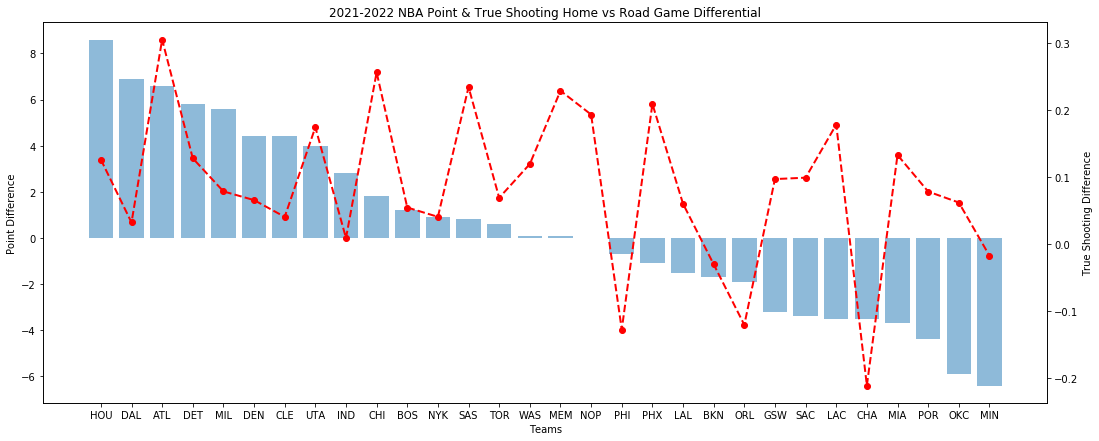

In [104]:
fig, ax = plt.subplots(figsize=(18,7))
ax.bar(merged_team_points.index, merged_team_points['PTS_DIFF'], alpha = 0.5)
ax.set_title('2021-2022 NBA Point & True Shooting Home vs Road Game Differential')
ax.set_xlabel('Teams')
ax.set_ylabel('Point Difference')

# adding in home and away TS%
ax2 = ax.twinx()
ax2.plot(merged_team_points.index, merged_team_points['TS_DIFF'], 'ro--', linewidth=2)
ax2.set_ylabel('True Shooting Difference')

# Introducing standings
### Adding in to the graph the end of regular season standings, to see how much an impact this home vs road differential plays in the end results. Added as a colour scale using LinearSegmentedColormap, this will portray the top seeded team as bright green, transitioning to dark red for the lowest seed

In [89]:
merged_team_points.index

Index(['HOU', 'DAL', 'ATL', 'DET', 'MIL', 'DEN', 'CLE', 'UTA', 'IND', 'CHI',
       'BOS', 'NYK', 'SAS', 'TOR', 'WAS', 'MEM', 'NOP', 'PHI', 'PHX', 'LAL',
       'BKN', 'ORL', 'GSW', 'SAC', 'LAC', 'CHA', 'MIA', 'POR', 'OKC', 'MIN'],
      dtype='object', name='TEAM')

In [90]:
standings = [30,5,16,28,7,10,15,9,26,12,6,19,22,11,21,2,20,8,1,23,14,29,3,24,18,17,4,25,27,13]

In [91]:
from matplotlib.colors import LinearSegmentedColormap

In [92]:
cmap = LinearSegmentedColormap.from_list('Custom', [(0, '#00FF00'), (1, '#FF0000')], N=30)

In [93]:
norm = plt.Normalize(1, 30)
colors = cmap(norm(standings))

Text(0, 0.5, 'True Shooting Difference')

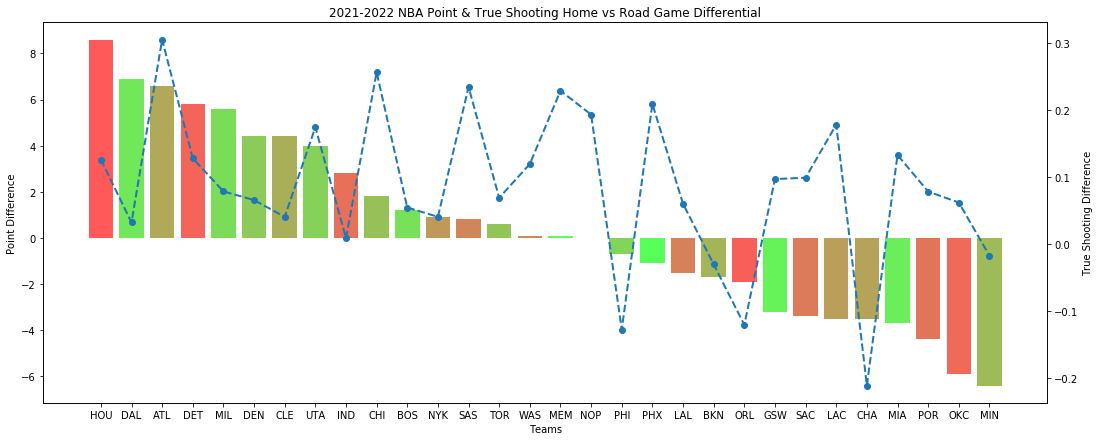

In [94]:
fig, ax = plt.subplots(figsize=(18,7))
ax.bar(merged_team_points.index, merged_team_points['PTS_DIFF'], alpha = 0.65, color = colors)
ax.set_title('2021-2022 NBA Point & True Shooting Home vs Road Game Differential')
ax.set_xlabel('Teams')
ax.set_ylabel('Point Difference')

# adding in home and away TS%
ax2 = ax.twinx()
ax2.plot(merged_team_points.index, merged_team_points['TS_DIFF'], 'o--', linewidth=2)
ax2.set_ylabel('True Shooting Difference')


### Extremely suprising to see houston take out the No.1 Home vs Road differential result, They finished far towards the end of the standings.
### Apart from that a clear trend can be seen where the majority of green teams have a positive differential.
### While the True Shooting differential is strong on the positive side of the graph, the negative remains on average with a positive TS differential %, with only 4 teams negative. 


In [110]:
merged_team_points['Standings'] = standings

In [116]:
merged_team_points[merged_team_points['PTS_DIFF']>0]['Standings'].mean()

15.235294117647058

In [118]:
merged_team_points[merged_team_points['PTS_DIFF']<0]['Standings'].mean()

15.846153846153847

### As ideal as it is to perform great at home, there is no correlation to scoring more points at home than scoring points on the road to NBA success. Scoring points home and away is the key to a strong team robust enough to win the championship. No.1 Seed Phoenix and eventual champs Golden State Warriors are both on the negative side of the above chart. 

In [95]:
# Player summary

Text(0, 0.5, 'Point Difference')

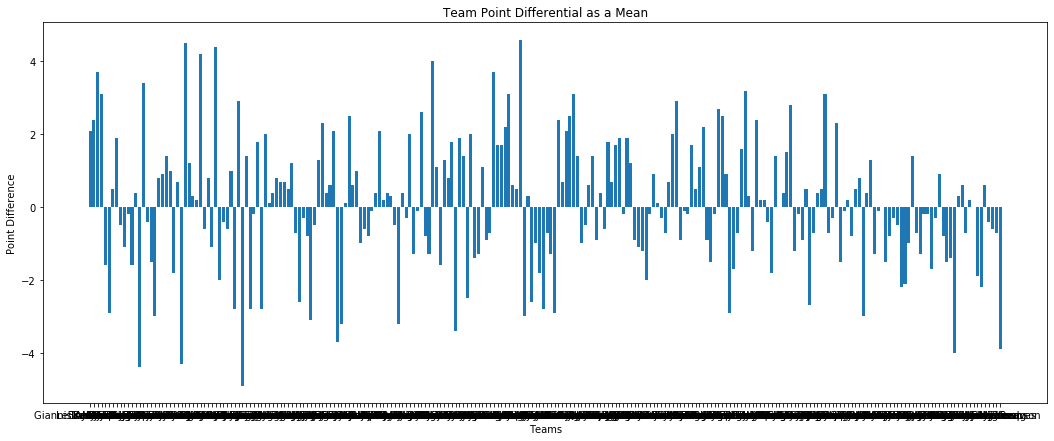

In [123]:
fig, ax = plt.subplots(figsize=(18,7))
ax.bar(points_sumry['PLAYER'], points_sumry['PTS_DIFF'])
ax.set_title('Team Point Differential as a Mean')
ax.set_xlabel('Teams')
ax.set_ylabel('Point Difference')

### More to come !